# A FICO problem

Fico is the industry standard for determining credit worthiness. However, research shows that FICO is overused. FICO's usage fits the idiom "square peg in a round hole".

Evidence:

* A [research study](https://www.stlouisfed.org/publications/regional-economist/october-2008/did-credit-scores-predict-the-subprime-crisis) by the Federal Reserve Bank of St. Louis demonstrates that __FICO scores were a poor indicater of the subprime mortgage crisis__.
> Given the nature of FICO scores, one might expect to find a relationship between borrowers’ scores and the incidence of default and foreclosure.....FICO scores have not indicated that relationship....higher FICO scores have been associated with bigger increases in default rates over time.
* [Studies prove](https://www.marketwatch.com/story/your-digital-footprint-could-provide-a-more-accurate-credit-score-2018-05-03) that __digital footprints can outperform FICO__.
> Those who order from mobile phones are three times as likely to default as those who order from desktops. A customer who uses her name in her email address is 30 percent less likely to default than one who doesn’t. Those who shop between noon and 6 p.m. are half as likely to default as midnight to 6 a.m. buyers
* FICO depends on credit usage (CU). __CU is unreliable__ because it fluctuates through economic cycles. [CU amongs millenials dropped](http://fortune.com/2018/02/27/why-millennials-are-ditching-credit-cards/), especially during the 2008 recession. But being debt conscious is financially desirable.
* Paying timely minimums on credit statements results in both a strong score and __mounting debt__.
* Credit utilization ratios factor heavily into FICO ( $util = \frac{debt}{availCredt}$ ). A healthy utilization is < 0.3. Credit card sneak companies sneakily encourage opening several credit lines to improve this ratio. There is a conflict of interest, because __they profit on credit debt__.

# An ML solution to credit defaults

30,000 instances of credit default data were collected by the University of California Irvine. We will predict credit defaults by training a variety of machine learning models using this data set.

### Data Cleansing and Exploration

In [229]:
import pandas as pd
fname = './UCI_Credit_Card.csv'

pd.set_option('display.max_columns', None)
pd.option_context('mode.use_inf_as_null', True)

df = pd.read_csv(fname)
df.sample(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
26327,26328,50000.0,2,1,2,33,0,0,2,2,2,2,25123.0,27773.0,28627.0,32708.0,31886.0,33808.0,3400.0,1600.0,4900.0,0.0,2600.0,1500.0,1
22024,22025,60000.0,2,1,2,27,1,-1,-1,-1,0,0,0.0,3947.0,5691.0,21001.0,17931.0,2439.0,3947.0,5691.0,21028.0,0.0,0.0,841.0,0
24296,24297,80000.0,1,3,1,41,0,0,0,0,0,0,81070.0,63610.0,58099.0,52599.0,52519.0,46945.0,2385.0,5028.0,21595.0,5541.0,1507.0,3062.0,0
21039,21040,90000.0,1,3,1,39,0,0,0,0,0,0,93757.0,91359.0,88616.0,56887.0,46700.0,47272.0,4000.0,2625.0,2511.0,1501.0,1391.0,1393.0,1
26187,26188,50000.0,2,1,2,30,-2,-2,-2,-2,-2,-2,0.0,2070.0,0.0,0.0,0.0,0.0,2070.0,0.0,0.0,0.0,0.0,0.0,0
29608,29609,40000.0,1,2,1,40,1,2,0,0,0,0,34364.0,33512.0,34549.0,35572.0,36481.0,37889.0,0.0,1577.0,1600.0,1500.0,2000.0,2000.0,1
20500,20501,430000.0,1,1,2,29,-2,-2,-2,-2,-2,-2,325.0,325.0,325.0,0.0,325.0,650.0,325.0,325.0,0.0,325.0,650.0,150.0,0
26716,26717,490000.0,1,1,2,28,0,0,0,0,0,0,325669.0,206515.0,144853.0,132268.0,118899.0,79223.0,10041.0,7415.0,7025.0,44324.0,3119.0,2780.0,0
2916,2917,20000.0,1,3,2,26,8,7,6,5,4,3,43340.0,42619.0,35381.0,31539.0,27409.0,23567.0,0.0,0.0,0.0,0.0,0.0,300.0,0
24992,24993,500000.0,1,1,1,31,1,-2,-2,-2,-1,0,0.0,0.0,0.0,0.0,881.0,881.0,0.0,0.0,0.0,881.0,0.0,0.0,1


In [230]:
print('Rows of data: ', df.shape[0])
print('Columns of data: ', df.shape[1])

Rows of data:  30000
Columns of data:  25


In [231]:
labels = df['default.payment.next.month']
df = df.drop(['default.payment.next.month'], axis=1)

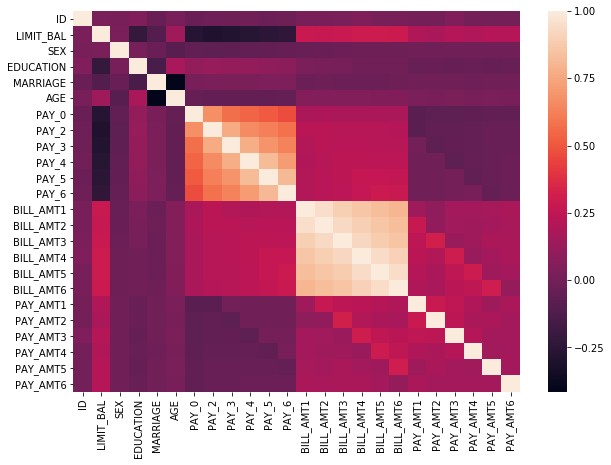

In [232]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr, ax=ax);

In [233]:
df = df.drop(['ID'], axis=1)

In [234]:
for i in range(1,7):
    payment_key = 'PAY_AMT'+str(i)
    bill_key = 'BILL_AMT'+str(i)
    frac_paid = df[payment_key]/df[bill_key]
    df['fraction_paid_'+str(i)] = frac_paid
    df = df.drop([bill_key, payment_key], axis=1)
    
with pd.option_context('mode.use_inf_as_null', True):
    df = df.fillna(1)

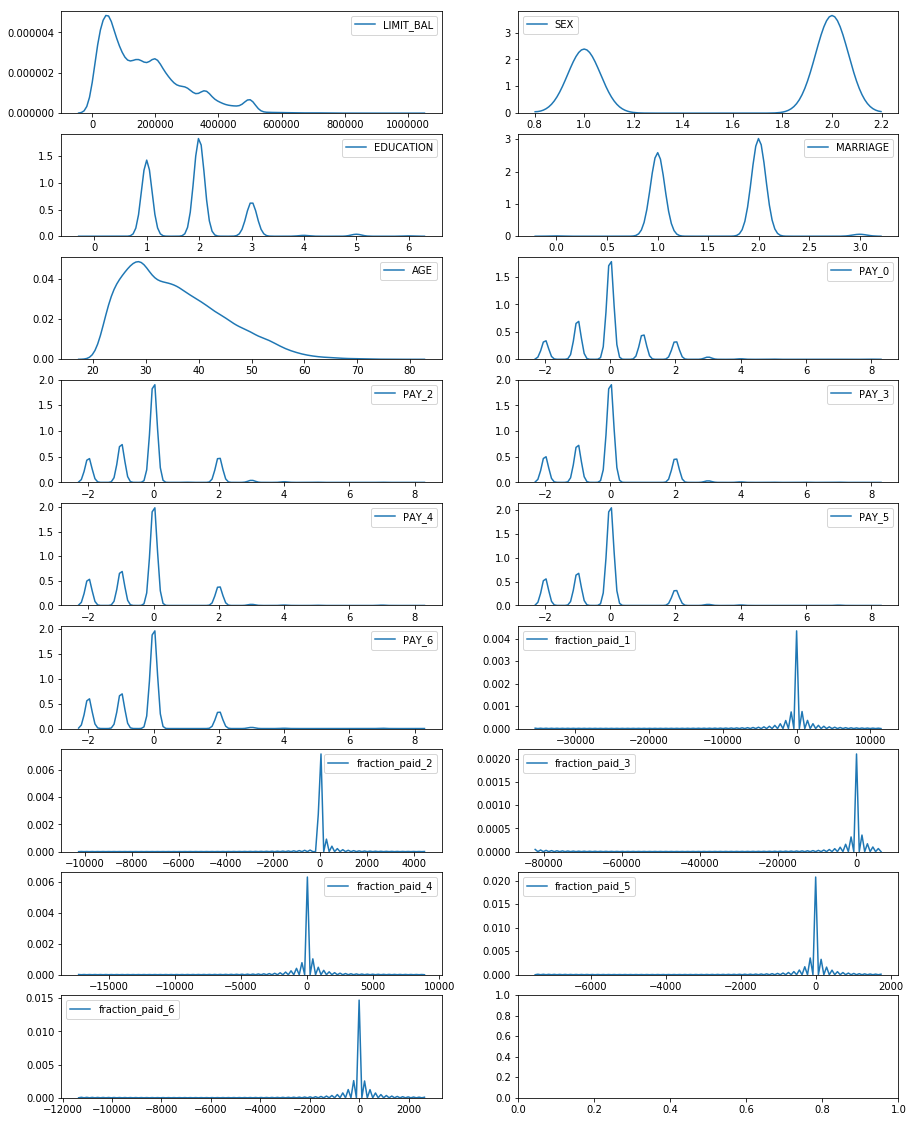

In [235]:
import math

ncols = 2
nrows = math.ceil(len(df.columns)/2)

chart, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,20))

for i, key in enumerate(df.columns):
    row = math.floor(i/ncols)
    col = 0 if i % 2 == 0 else 1
    sns.kdeplot(df[key], ax=axes[row,col])

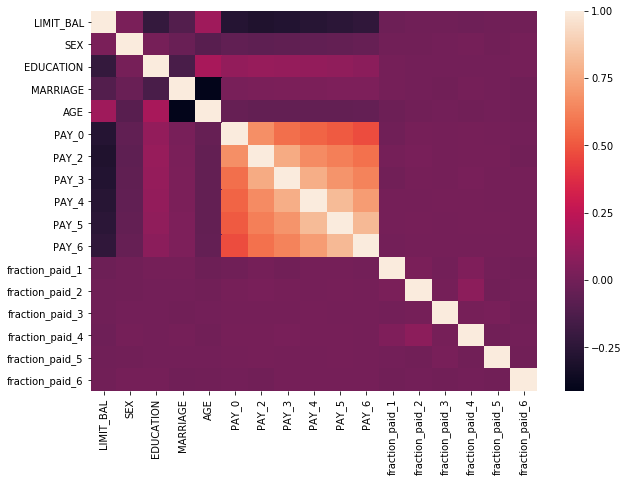

In [236]:
corr = df.corr()
f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr, ax=ax);

### Machine Learning Models

In [237]:
from sklearn import preprocessing

labels = labels.values
features = preprocessing.scale(df.values)

In [238]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.7, random_state=42)

In [239]:
results = {
        'meta': {
            'samples_trained': len(X_train),
            'samples_tested': len(X_test)
            },
        'models': []
        }

print('Training set size: %d\nTesting set size: %s' % (len(X_train), len(X_test)))

Training set size: 9000
Testing set size: 21000


In [240]:
from time import time
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

def svm(train_features, train_labels, test_features, test_labels):
    clf = SVC()
    tStart = time()
    clf.fit(train_features, train_labels)

    results['models'].append({
        'name': 'svm',
        'training_time': round(time()-tStart, 3),
        'accuracy': accuracy_score(clf.predict(test_features), test_labels)
        })

def lr(train_features, train_labels, test_features, test_labels):
    clf = LogisticRegression(random_state=0)
    tStart = time()
    clf.fit(train_features, train_labels)

    results['models'].append({
        'name': 'logistic regression',
        'training_time': round(time()-tStart, 3),
        'accuracy': accuracy_score(clf.predict(test_features), test_labels)
        })

In [241]:
svm(X_train, y_train, X_test, y_test)
lr(X_train, y_train, X_test, y_test)

### Results

In [242]:
models = [x['name'] for x in results['models']]
training_times = [x['training_time'] for x in results['models']]
accuracies = [x['accuracy'] for x in results['models']]

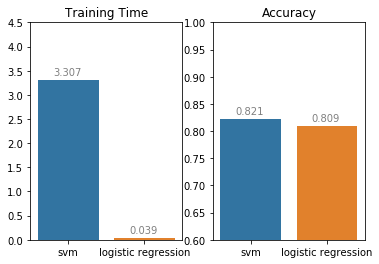

In [243]:
ncols = 2
nrows = math.ceil(len(models)/2)

chart, (ax1, ax2) = plt.subplots(nrows=nrows, ncols=ncols)

ax1.set_title('Training Time')
ax2.set_title('Accuracy')

ax1.set(ylim=(0, 4.5))
ax2.set(ylim=(0.6, 1))

for i, v in enumerate(accuracies):
    ax2.text(i-0.2, v+0.01, str(round(v,3)), color='grey')
for i, v in enumerate(training_times):
    ax1.text(i-0.2, v+0.1, str(round(v,3)), color='grey')

sns.barplot(models, training_times, ax=ax1)
sns.barplot(models, accuracies, ax=ax2);